min loss iteration: 9999
accuracy: 0.9266666666666666


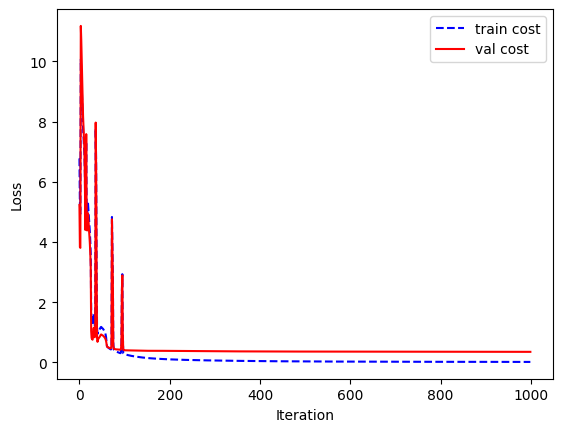

In [ ]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


def load_dataset():
  train_dataset = h5py.File('train_happy.h5', "r")
  test_dataset = h5py.File('test_happy.h5', "r")
  train_set_x_orig = np.array(train_dataset["train_set_x"][:])
  train_set_y_orig = np.array(train_dataset["train_set_y"][:])
  test_set_x_orig = np.array(test_dataset["test_set_x"][:])
  test_set_y_orig = np.array(test_dataset["test_set_y"][:])
  classes = np.array(test_dataset["list_classes"][:])
  train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
  test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))
  return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes

def sigmoid(z):
  return 1 / (1 + np.exp(-z))

def norm(arr):
  min_val = np.min(arr)
  max_val = np.max(arr)
  normalized_arr = (arr - min_val) / (max_val - min_val)
  return normalized_arr

def split(x,y,test_ratio):
  x1, x2, y1, y2 = train_test_split(x,y, test_size = test_ratio)
  return x1, x2, y1, y2

def grad(x,y,theta):
  m = x.shape[0]
  y_hat = sigmoid(x@theta)
  g = (1/m)*x.T@(y_hat-y)
  return g

def binary_cross_entropy_loss(x, y,theta):
  y_hat = sigmoid(x@theta)
  epsilon = 1e-15
  y_hat = np.clip(y_hat, epsilon, 1 - epsilon)
  loss = - (y * np.log(y_hat) + (1 - y) * np.log(1 - y_hat))
  return np.mean(loss)

def conv2D(x):
  total_elements_original = np.prod(x.shape)
  x = x.reshape((x.shape[0], total_elements_original //x.shape[0]))
  return x

def add_ones(x):
  tmp = np.ones(shape = (x.shape[0],1))
  x = np.concatenate((tmp,x), axis = 1)
  return x

#Load datasets
x, y, x_test, y_test, list_classes = load_dataset()
y= y.T
y_test = y_test.T

#Data Normalizing and Dimenssion Processing
x = conv2D(norm(x))
x_test = conv2D(norm(x_test))

#Adding Ones in the 1st Column
x = add_ones(x)
x_test = add_ones(x_test)

#Spliting into train and Validation set
x_train, x_val, y_train, y_val = split(x,y,0.15)

m_train,n = x_train.shape
m_test = x_test.shape[0]

#Model parameters initializing
theta = np.random.normal(size =(n,1))
theta_min = theta
max_iter = 10000
val_loss_min = binary_cross_entropy_loss(x_val,y_val, theta)
alpha = 0.0065

tr_costs = list()
val_costs = list()

#Training the Model
for itr in range(max_iter):
  g = grad(x_train, y_train, theta)
  theta = theta -alpha * g

  if binary_cross_entropy_loss(x_val,y_val, theta)< val_loss_min:
    val_loss_min = binary_cross_entropy_loss(x_val,y_val, theta)
    theta_min = theta
    itr_min_loss = itr

  if itr%10 ==0:
    tr_cost = binary_cross_entropy_loss(x_train,y_train,theta)
    val_cost = binary_cross_entropy_loss(x_val,y_val, theta)
    tr_costs.append(tr_cost)
    val_costs.append(val_cost)

#Plot Loss vs Iteration
plt.plot(tr_costs,'b--', label= 'train cost')
plt.plot(val_costs, 'r-',label = 'val cost')
plt.legend(loc = 'best')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.show


accuracy = accuracy_score(y_test, np.round(sigmoid(x_test@theta_min)))
print(f'min loss iteration: {itr_min_loss}')
print(f'accuracy: {accuracy}')

In [ ]:

print(val_loss_min)
print(binary_cross_entropy_loss(x_test,y_test, theta_min))

0.6026177348262102
0.7744062476531045


In [ ]:
print(np.max(x_test), np.max(x_val))

255.0 255.0
